<a href="https://colab.research.google.com/github/BKV15/AI_Utech/blob/main/Practice/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing, image classification using KNN and ANN

Practice makes perfects. Applying what is learned is the best way to make sense of what's going on.

* ` Step 1 : ` Image processing using matplotlib and numpy
* ` Step 2 : ` Importing MNIST dataset and classify it by KNN
* ` Step 3 : ` Use an ANN to classify MNIST dataset
* ` Step 4 : Optional ` Use a CNN to classify MNIST dataset  

# Step 1 : Image Processing

## ` Import Libraries`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from skimage.transform import resize
warnings.filterwarnings('ignore')

## ` Downloading an image with linux command for download`

In [ ]:
!wget https://images.theconversation.com/files/350865/original/file-20200803-24-50u91u.jpg

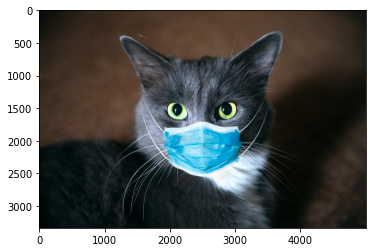

In [3]:
cat_image = plt.imread('cat.jpg')
plt.imshow(cat_image)

## ` Changing color channels`

In [4]:
cat_image = np.array(cat_image)

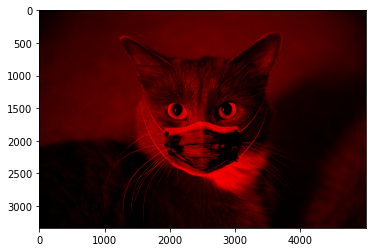

In [5]:
cat_red = cat_image.copy()
cat_red[:,:,1:] = (0,0)
plt.imshow(cat_red)

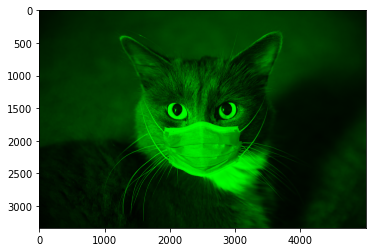

In [6]:
cat_green = cat_image.copy()
cat_green[:,:,[0,2]] = (0,0)
plt.imshow(cat_green)

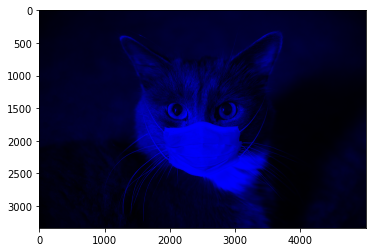

In [7]:
cat_blue = cat_image.copy()
cat_blue[:,:,:2] = (0,0)
plt.imshow(cat_blue)

## `Converting image to grayscale`

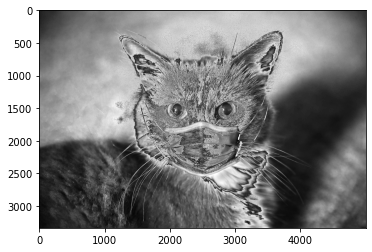

In [8]:
red = cat_image[:,:,0]
green = cat_image[:,:,1]
blue = cat_image[:,:,2]
gray = (red + green + blue) / 3
plt.imshow(gray , cmap='gray')

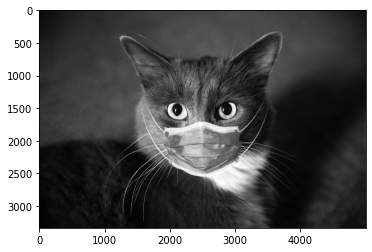

In [9]:
red = cat_image[:,:,0]
green = cat_image[:,:,1]
blue = cat_image[:,:,2]
gray = (red * 0.4 + green * 0.5 + blue * 0.1) / 3
plt.imshow(gray , cmap='gray')

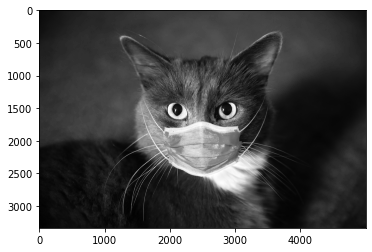

In [10]:
cat_gray = np.dot(cat_image[:,:,:] , [0.2,0.5,0.1]).astype('uint32')
plt.imshow(cat_gray , cmap='gray')

## `Applying some useless filter to image`

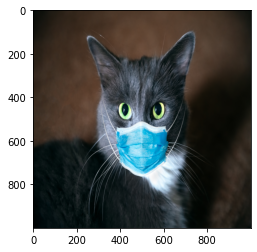

In [11]:
cat_small = resize(plt.imread('cat.jpg') , (1000,1000))
plt.imshow(cat_small)

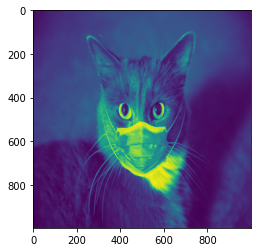

In [61]:
def filter(row , col , img):

    average = (np.sum(img[row - 1 , col]) / 3 + 
    np.sum(img[row - 1 , col - 1]) / 3 + 
    np.sum(img[row - 1 , col + 1]) / 3 +
    np.sum(img[row , col]) / 3 +
    np.sum(img[row , col - 1]) / 3 +
    np.sum(img[row , col + 1]) / 3 +
    np.sum(img[row + 1 , col]) / 3 +
    np.sum(img[row + 1 , col - 1]) / 3 +
    np.sum(img[row + 1 , col + 1]) / 3) / 9

    return average


rows = cat_small.shape[0]
cols = cat_small.shape[1]

cat_weird = np.zeros((rows - 2 , cols - 2))

for row in range(0 , rows - 2):
    for col in range(0 , cols - 2):
        cat_weird[row , col] = filter(row + 1 , col + 1 , cat_small)

plt.imshow(cat_weird)

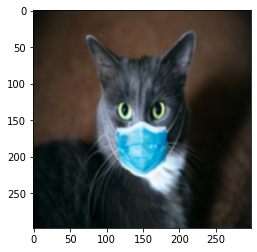

In [59]:
def filter(row , col , img):

    red = (img[row - 1 , col , 0] +
           img[row - 1 , col - 1 , 0] +
           img[row - 1 , col + 1 , 0] +
           img[row , col , 0] +
           img[row , col - 1 , 0] +
           img[row , col + 1 , 0] +
           img[row + 1 , col , 0] +
           img[row + 1 , col - 1 , 0] +
           img[row + 1 , col + 1 , 0]) / 9

    green = (img[row - 1 , col , 1] +
           img[row - 1 , col - 1 , 1] +
           img[row - 1 , col + 1 , 1] +
           img[row , col , 1] +
           img[row , col - 1 , 1] +
           img[row , col + 1 , 1] +
           img[row + 1 , col , 1] +
           img[row + 1 , col - 1 , 1] +
           img[row + 1 , col + 1 , 1]) / 9
    
    blue = (img[row - 1 , col , 2] +
           img[row - 1 , col - 1 , 2] +
           img[row - 1 , col + 1 , 2] +
           img[row , col , 2] +
           img[row , col - 1 , 2] +
           img[row , col + 1 , 2] +
           img[row + 1 , col , 2] +
           img[row + 1 , col - 1 , 2] +
           img[row + 1 , col + 1 , 2]) / 9

    return (red,green,blue)


rows = cat_small.shape[0]
cols = cat_small.shape[1]

cat_weird = np.zeros((rows - 2 , cols - 2 , 3))

for row in range(0 , rows - 2):
    for col in range(0 , cols - 2):
        cat_weird[row , col , :] = filter(row + 1 , col + 1 , cat_small)

plt.imshow(cat_weird)

# Step 2 : Classification with KNN

## `Importing Libraries`

In [12]:
import tensorflow.keras.datasets.mnist
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## `Loading Dataset`

In [ ]:
(X_train , y_train) , (X_test , y_test) = tensorflow.keras.datasets.mnist.load_data()

5


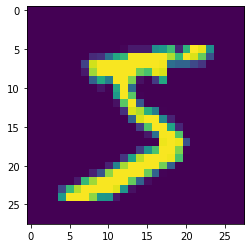

In [14]:
plt.imshow(X_train[0])
print(y_train[0])

## `Flattening images for KNN and ANN`

In [15]:
X_train_flat = np.array([img.reshape(784) for img in X_train])
X_test_flat = np.array([img.reshape(784) for img in X_test])

## `One hot encoding labels`
machine learning models like knn doesn't throw an exception during training when labels are one hot encoded, but they do when trying to calculate scores or predict a new sample.

In [16]:
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder() , [0])] , remainder='passthrough')
y_train_ohe = ct.fit_transform(y_train.reshape(-1,1))
y_test_ohe = ct.fit_transform(y_test.reshape(-1,1))

## `Creating and training the model`

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_flat , y_train)

KNeighborsClassifier(n_neighbors=7)

In [18]:
print(f'Testing accuracy : {knn.score(X_test_flat , y_test)}')

Testing accuracy : 0.9694


In [19]:
print(f'Training accuracy : {knn.score(X_train_flat , y_train)}')

Training accuracy : 0.97915


## ` Predict a sample from test dataset`

In [20]:
# Sample number range : (0,9999)
sample = 9985

predicted = knn.predict([X_test_flat[sample]])
actual = y_test[sample]
predicted_proba = knn.predict_proba([X_test_flat[sample]])

print(f'Sample # {sample} is {actual} and predicted to be {predicted}')
print(f'Prediction probabilites :\n {predicted_proba}')

Sample # 9985 is 2 and predicted to be [2]
Prediction probabilites :
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


# Step 3 : Classification With Artificial Neural Networks

## ` Importing Libraries`

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout
from sklearn.preprocessing import StandardScaler

## ` OneHotEncoding with keras`

In [22]:
y_train_keras = keras.utils.to_categorical(y_train , num_classes=10)
y_test_keras = keras.utils.to_categorical(y_test , num_classes=10)

## ` Scaling features dataset`
According to Deep Learning AZ, all features regardless of whether they are categorical or continous , should be scaled for neural network.

In this notebook example scaling is done with two method :
* ` First manually`
* ` Second by scikit_learn` 

In [23]:
X_train_flat_man = X_train_flat / 255
X_test_flat_man = X_test_flat / 255

In [24]:
sc = StandardScaler()
X_train_flat_sk = sc.fit_transform(X_train_flat)
X_test_flat_sk = sc.transform(X_test_flat)

## ` Summary of all trains and test`

In [25]:
print('Original Dataset : ')
print(f'X_train : (type : {type(X_train)} , shape : {X_train.shape})')
print(f'y_train : (type : {type(y_train)} , shape : {y_train.shape})')
print(f'X_test : (type : {type(X_test)} , shape : {X_test.shape})')
print(f'y_test : (type : {type(y_test)} , shape : {y_test.shape})')
print('---------------------------------------------------')
print('Flatten X dataset : ')
print(f'X_train_flat : (type : {type(X_train_flat)} , shape : {X_train_flat.shape})')
print(f'X_test_flat : (type : {type(X_test_flat)} , shape : {X_test_flat.shape})')
print('---------------------------------------------------')
print('Flatten X dataset scaled manually : ')
print(f'X_train_flat_man : (type : {type(X_train_flat_man)} , shape : {X_train_flat_man.shape})')
print(f'X_test_flat_man : (type : {type(X_test_flat_man)} , shape : {X_test_flat_man.shape})')
print('---------------------------------------------------')
print('Flatten X dataset scaled by scikit-learn : ')
print(f'X_train_flat_sk : (type : {type(X_train_flat_sk)} , shape : {X_train_flat_sk.shape})')
print(f'X_test_flat_sk : (type : {type(X_test_flat_sk)} , shape : {X_test_flat_sk.shape})')
print('---------------------------------------------------')
print('OneHotEncoded y train with scikit-learn : ')
print(f'y_train_ohe : (type : {type(y_train_ohe)} , shape : {y_train_ohe.shape})')
print(f'y_test_ohe : (type : {type(y_test_ohe)} , shape : {y_test_ohe.shape})')
print('---------------------------------------------------')
print('OneHotEncoded y train with keras : ')
print(f'y_train_keras : (type : {type(y_train_keras)} , shape : {y_train_keras.shape})')
print(f'y_test_keras : (type : {type(y_test_keras)} , shape : {y_test_keras.shape})')

Original Dataset : 
X_train : (type : <class 'numpy.ndarray'> , shape : (60000, 28, 28))
y_train : (type : <class 'numpy.ndarray'> , shape : (60000,))
X_test : (type : <class 'numpy.ndarray'> , shape : (10000, 28, 28))
y_test : (type : <class 'numpy.ndarray'> , shape : (10000,))
---------------------------------------------------
Flatten X dataset : 
X_train_flat : (type : <class 'numpy.ndarray'> , shape : (60000, 784))
X_test_flat : (type : <class 'numpy.ndarray'> , shape : (10000, 784))
---------------------------------------------------
Flatten X dataset scaled manually : 
X_train_flat_man : (type : <class 'numpy.ndarray'> , shape : (60000, 784))
X_test_flat_man : (type : <class 'numpy.ndarray'> , shape : (10000, 784))
---------------------------------------------------
Flatten X dataset scaled by scikit-learn : 
X_train_flat_sk : (type : <class 'numpy.ndarray'> , shape : (60000, 784))
X_test_flat_sk : (type : <class 'numpy.ndarray'> , shape : (10000, 784))
-------------------------

## ` Build and compiling the model`

In [26]:
ann = Sequential()
ann.add(Dense(100 , activation='relu' , input_dim=784))
ann.add(Dense(50 , activation='relu'))
ann.add(Dense(10 , activation='softmax'))

In [27]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [28]:
ann.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])

## ` Training model - 1` 
Since we have two sets of scaled dataset we train the model two times each time with a different dataset

In [29]:
ann.fit(X_train_flat_man , y_train_keras , batch_size=100 , epochs=10 , validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 3s 5ms/step - loss: 0.3413 - accuracy: 0.9059 - val_loss: 0.2014 - val_accuracy: 0.9405
Epoch 2/10
480/480 [==============================] - 2s 5ms/step - loss: 0.1546 - accuracy: 0.9549 - val_loss: 0.1254 - val_accuracy: 0.9625
Epoch 3/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1087 - accuracy: 0.9679 - val_loss: 0.1213 - val_accuracy: 0.9642
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0829 - accuracy: 0.9756 - val_loss: 0.1164 - val_accuracy: 0.9649
Epoch 5/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0666 - accuracy: 0.9796 - val_loss: 0.0941 - val_accuracy: 0.9732
Epoch 6/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0971 - val_accuracy: 0.9738
Epoch 7/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0966 - val_accuracy: 0.9732
Epoch 

## ` Evaluating model - 1`

In [30]:
loss , acc = ann.evaluate(X_test_flat_man , y_test_keras)
print(f'Loss : {loss:.2f} , Accuracy : {acc:.2f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9785
Loss : 0.08 , Accuracy : 0.98


## `Prediction with model - 1`

In [31]:
# Sample range : 0-9999
sample = 323

predicted_proba = ann.predict(np.array([X_test_flat_man[sample]]))
predicted = np.argmax(predicted_proba , axis=1)
actual = np.argmax(y_test_keras[sample])

print(f'Predicted probablities for sample # {sample} is : \n {predicted_proba}')
print(f'Sample # {sample} is {actual} and is predicted {predicted}')

Predicted probablities for sample # 323 is : 
 [[2.6269733e-12 6.8235850e-10 2.9814959e-08 9.9997425e-01 1.0941415e-16
  1.1352758e-08 1.2761106e-16 5.2670677e-14 2.5676465e-05 1.3823600e-08]]
Sample # 323 is 3 and is predicted [3]


## `Training model - 2`

In [32]:
ann.fit(X_train_flat_sk , y_train_keras , batch_size=100 , validation_split=0.2 , epochs=10)

Epoch 1/10
480/480 [==============================] - 2s 5ms/step - loss: 0.4808 - accuracy: 0.9710 - val_loss: 0.4621 - val_accuracy: 0.9642
Epoch 2/10
480/480 [==============================] - 2s 5ms/step - loss: 0.1640 - accuracy: 0.9819 - val_loss: 0.3984 - val_accuracy: 0.9618
Epoch 3/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0860 - accuracy: 0.9869 - val_loss: 0.3601 - val_accuracy: 0.9677
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0571 - accuracy: 0.9896 - val_loss: 0.3558 - val_accuracy: 0.9674
Epoch 5/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9927 - val_loss: 0.3559 - val_accuracy: 0.9659
Epoch 6/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0288 - accuracy: 0.9938 - val_loss: 0.3291 - val_accuracy: 0.9690
Epoch 7/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0171 - accuracy: 0.9957 - val_loss: 0.3427 - val_accuracy: 0.9706
Epoch 

## ` Evaluating model - 2`

In [33]:
loss , acc = ann.evaluate(X_test_flat_sk , y_test_keras)
print(f'Loss : {loss:.2f} , Accuracy : {acc:.2f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.9719
Loss : 0.42 , Accuracy : 0.97


## `Prediction with model - 2`

In [34]:
# Sample range : 0-9999
sample = 323

predicted_proba = ann.predict(np.array([X_test_flat_sk[sample]]))
predicted = np.argmax(predicted_proba , axis=1)
actual = np.argmax(y_test_keras[sample])

print(f'Predicted probablities for sample # {sample} is : \n {predicted_proba}')
print(f'Sample # {sample} is {actual} and is predicted {predicted}')

Predicted probablities for sample # 323 is : 
 [[4.3426711e-32 1.8790642e-18 1.9933635e-22 1.0000000e+00 1.8912371e-35
  4.0406941e-21 0.0000000e+00 6.0304371e-34 1.1958028e-15 8.2317946e-18]]
Sample # 323 is 3 and is predicted [3]


# Step 4 : Convolutional Neural Network

Images won't get flatten in CNN.

## `Scaling Images`

In [59]:
X_train_cnn = X_train / 255
X_test_cnn = X_test / 255

## `Importing Libraries`

In [83]:
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns

## `Creating and Compilin the model`

In [64]:
cnn = Sequential()
cnn.add(Conv2D(64 , (3,3) , activation='relu' , input_shape = (28,28,1)))
cnn.add(MaxPool2D((2,2)))
cnn.add(Conv2D(64 , (3,3) , activation='relu'))
cnn.add(MaxPool2D((2,2)))
cnn.add(Conv2D(128 , (3,3) ,activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(128 , activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10 , activation='softmax'))

In [67]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)             

In [65]:
cnn.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])

## ` Train the model`

In [69]:
history = cnn.fit(X_train_cnn , y_train_keras , batch_size=256 , validation_split=0.2 , epochs=10)

Epoch 1/10
188/188 [==============================] - 66s 349ms/step - loss: 0.0376 - accuracy: 0.9889 - val_loss: 0.0378 - val_accuracy: 0.9900
Epoch 2/10
188/188 [==============================] - 66s 349ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0378 - val_accuracy: 0.9902
Epoch 3/10
188/188 [==============================] - 66s 349ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0415 - val_accuracy: 0.9897
Epoch 4/10
188/188 [==============================] - 66s 350ms/step - loss: 0.0209 - accuracy: 0.9940 - val_loss: 0.0399 - val_accuracy: 0.9897
Epoch 5/10
188/188 [==============================] - 65s 348ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0373 - val_accuracy: 0.9909
Epoch 6/10
188/188 [==============================] - 65s 348ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0340 - val_accuracy: 0.9918
Epoch 7/10
188/188 [==============================] - 65s 348ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0369 - val_ac

## `Evaluation`

In [71]:
loss , acc = cnn.evaluate(X_test_cnn , y_test_keras)
print(f'Test accuracy : {acc:.2f} , Test loss : {loss:.2f}')

313/313 [==============================] - 5s 15ms/step - loss: 0.0298 - accuracy: 0.9937
Test accuracy : 0.99 , Test loss : 0.03


In [79]:
predicted_proba = cnn.predict(X_test_cnn)
predicted = np.argmax(predicted_proba , axis=1)
actual = np.argmax(y_test_keras , axis=1)

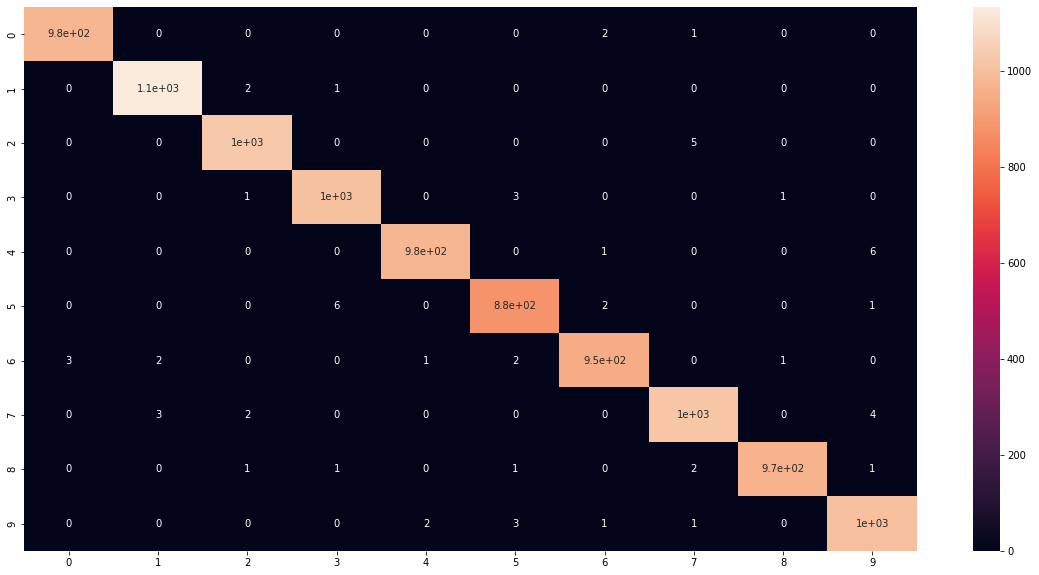

In [88]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(actual , predicted) , annot=True)